In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from scipy.signal import convolve2d

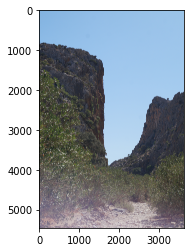

In [ ]:
img = cv2.imread('img.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

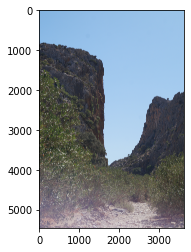

In [ ]:
gauss_d1 = cv2.GaussianBlur(img, (3, 3), 0)
gauss_d2 = cv2.GaussianBlur(img, (7, 7), 0)
plt.imshow(gauss_d1)
plt.imshow(gauss_d2)

In [ ]:
image = np.zeros((256, 256), np.float32)
gauss_d1 = np.zeros((256, 256), np.float32)
gauss_d2 = np.zeros((256, 256), np.float32)
ganglionic = np.zeros((256, 256), np.float32)
res = np.zeros((256, 256), np.float32)

In [ ]:
for i in range(13):
    for j in range(13):
        image = np.zeros((256, 256), np.float32)
        cv2.circle(image, (j + 122, i + 122), 1, (127, 127, 127), -1, 8, 0)
        gauss_d1 = cv2.GaussianBlur(image, (3, 3), 0)
        gauss_d2 = cv2.GaussianBlur(image, (7, 7), 0)
        ganglionic = cv2.subtract(gauss_d1, gauss_d2)
        v = ganglionic[128][128] * 3 + 128
        cv2.circle(res, (j * 16 + 32, i * 16 + 32), 2, (v, v, v), 3, 8, 0)

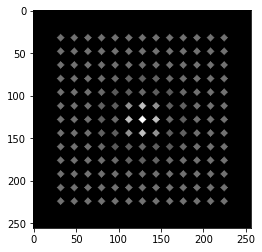

In [ ]:
plt.imshow(res, cmap='gray')

In [ ]:
def circle(filter=None, is_complex=False):
    chart = []
    res = np.zeros((256, 256), np.float32)
    v_prev = 0
    for i in range(30):
        image = np.zeros((256, 256), np.float32)
        cv2.circle(image, (128, 128), i, (255, 255, 255), -1, 8, 0)
        gauss_d1 = cv2.GaussianBlur(image, (15, 15), 0)
        gauss_d2 = cv2.GaussianBlur(image, (31, 31), 0)
        ganglionic = cv2.subtract(gauss_d1, gauss_d2)
    
        if filter is not None:
            ganglionic = convolve2d(ganglionic, filter)
    
        if is_complex:
            v = int(ganglionic.max())
        else:
            v = int(ganglionic[128][128])
        
        chart.append(v)
        cv2.line(res, (i * 8, 128 - v_prev // 5), ((i + 1) * 8, 128 - v // 5), (255, 255, 255))
        v_prev = v
  
    return chart

In [ ]:
def ring(filter=None, is_complex=False):
    chart = []
    res = np.zeros((256, 256), np.float32)
    v_prev = 0
    for i in range(30):
        image = np.zeros((256, 256), np.float32)
        cv2.circle(image, (128, 128), i, (255, 255, 255), 3, 8, 0)
        gauss_d1 = cv2.GaussianBlur(image, (15, 15), 0)
        gauss_d2 = cv2.GaussianBlur(image, (31, 31), 0)
        ganglionic = cv2.subtract(gauss_d1, gauss_d2)
    
    
        if filter is not None:
            ganglionic = convolve2d(ganglionic, filter)
    
        if is_complex:
            v = int(ganglionic.max())
        else:
            v = int(ganglionic[128][128])
    
        chart.append(v)
        cv2.line(res, (i * 8, 128 - v_prev // 5), ((i + 1) * 8, 128 - v // 5), (255, 255, 255))
        v_prev = v
  
    return chart

In [ ]:
def line(filter=None, is_complex=False):
  chart = []
  res = np.zeros((256, 256), np.float32)
  v_prev = 0
  for i in range(180):
    image = np.zeros((256, 256), np.float32)
    cv2.line(image, (128 + int(100 * np.cos(i / 57.2)), 128 + int(100 * np.sin(i / 57.2))),
                    (128 - int(100 * np.cos(i / 57.2)), 128 - int(100 * np.sin(i / 57.2))), (1000, 1000, 1000), 1, 8, 0)
    gauss_d1 = cv2.GaussianBlur(image, (15, 15), 0)
    gauss_d2 = cv2.GaussianBlur(image, (31, 31), 0)
    ganglionic = cv2.subtract(gauss_d1, gauss_d2)
    
    
    if filter is not None:
      ganglionic = convolve2d(ganglionic, filter)
    
    if is_complex:
        v = int(ganglionic.max())
    else:
        v = int(ganglionic[128][128])
    
    chart.append(v)
    cv2.line(res, (i * 8, 128 - v_prev // 5), ((i + 1) * 8, 128 - v // 5), (255, 255, 255))
    v_prev = v
  
  return chart

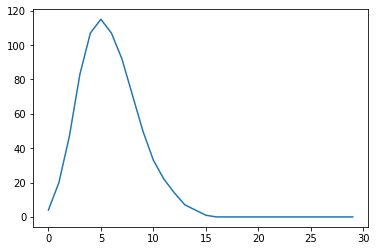

In [ ]:
chart = circle()
plt.plot(chart)

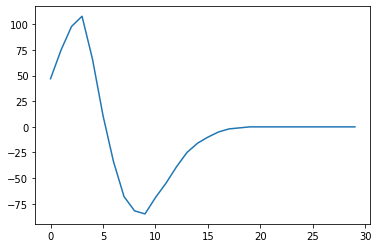

In [ ]:
chart = ring()
plt.plot(chart)

(0.0, 100.0)

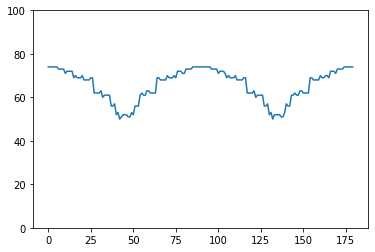

In [ ]:
chart = line()
plt.plot(chart)
plt.ylim(0, 100)

In [ ]:
filter1 = [[1, -1], [1, -1]]  # фильтр границ
filter2 = [[1, -2, 1],[1, -2, 1],[1, -2, 1]]  # фильтр черной линии на белом фоне
filter3 = [[-1, 2, -1],[-1, 2, -1],[-1, 2, -1]]  # фильтр белой линии на черном фоне

Реакция простых клеток:

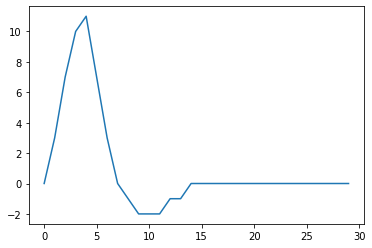

In [ ]:
chart = circle(filter1)
plt.plot(chart)

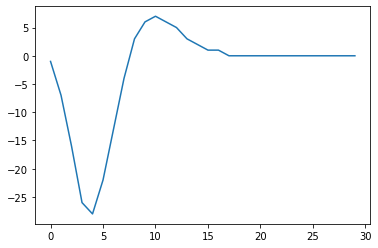

In [ ]:
chart = circle(filter2)
plt.plot(chart)

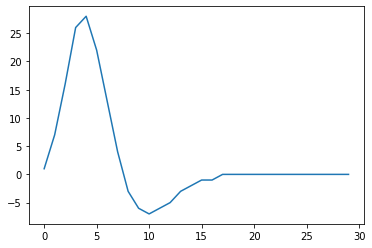

In [ ]:
chart = circle(filter3)
plt.plot(chart)

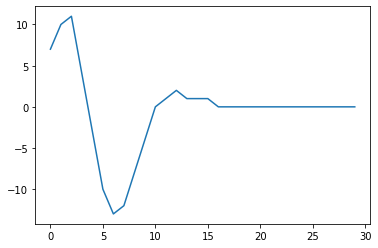

In [ ]:
chart = ring(filter1)
plt.plot(chart)

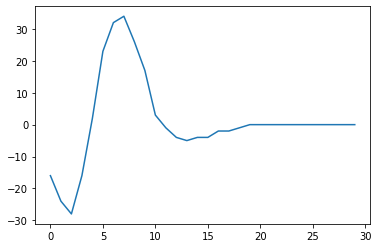

In [ ]:
chart = ring(filter2)
plt.plot(chart)

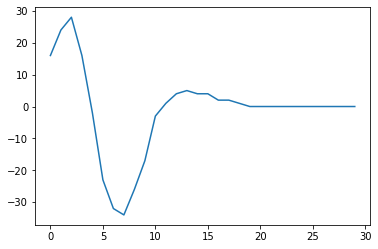

In [ ]:
chart = ring(filter3)
plt.plot(chart)

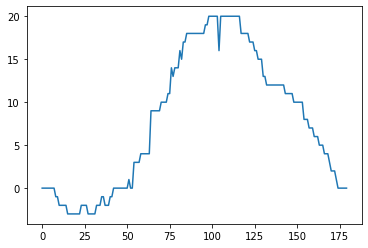

In [ ]:
chart = line(filter1)
plt.plot(chart)

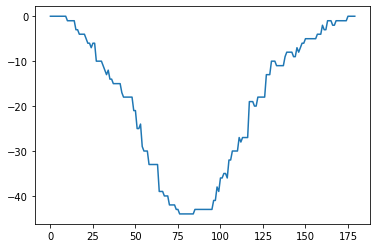

In [ ]:
chart = line(filter2)
plt.plot(chart)

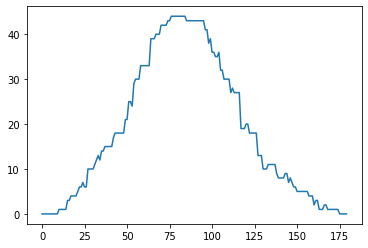

In [ ]:
chart = line(filter3)
plt.plot(chart)

Реакция сложных клеток

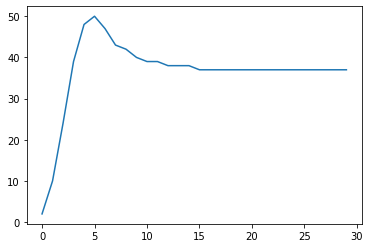

In [ ]:
chart = circle(filter1, is_complex=True)
plt.plot(chart)

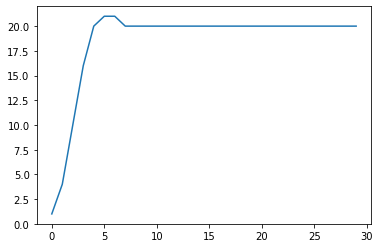

In [ ]:
chart = circle(filter2, is_complex=True)
plt.plot(chart)

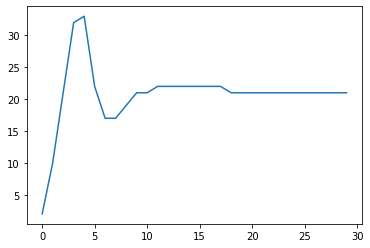

In [ ]:
chart = circle(filter3, is_complex=True)
plt.plot(chart)

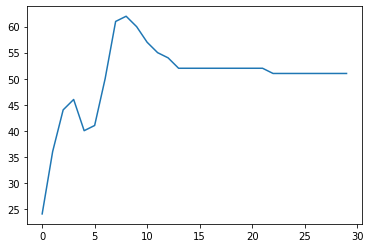

In [ ]:
chart = ring(filter1, is_complex=True)
plt.plot(chart)

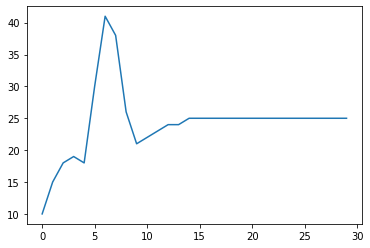

In [ ]:
chart = ring(filter2, is_complex=True)
plt.plot(chart)

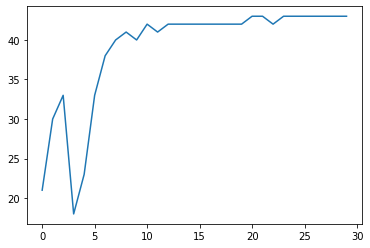

In [ ]:
chart = ring(filter3, is_complex=True)
plt.plot(chart)

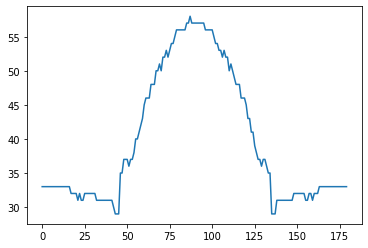

In [ ]:
chart = line(filter1, is_complex=True)
plt.plot(chart)

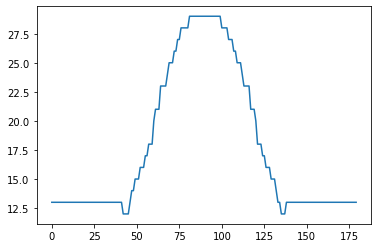

In [ ]:
chart = line(filter2, is_complex=True)
plt.plot(chart)

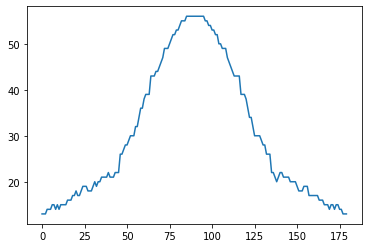

In [ ]:
chart = line(filter3, is_complex=True)
plt.plot(chart)